In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
# Diabetes Predictor using KNN
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

In [32]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')

In [33]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
#Replacing all the zeroes with mean of the data set

zero_not_accepted = ["Glucose","BloodPressure","SkinThickness","BMI","Insulin"]
for column in zero_not_accepted:
  dataset[column] = dataset[column].replace(0,np.NaN)
  mean = int(dataset[column].mean(skipna = True))
  dataset[column] = dataset[column].replace(np.NaN, mean)

In [35]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [36]:
# Splitting the dataset
X = dataset.iloc[:, 0:8]
Y = dataset.iloc[:, 8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2)



In [37]:
#feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [38]:
# k value should be 11 because of the following:
print(math.sqrt(len(Y_test)))

12.409673645990857


In [39]:
#Model definition
classifier = KNeighborsClassifier(n_neighbors = 11, p = 2, metric = "euclidean")
classifier.fit(X_train,Y_train)



KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [51]:
# predict the test results
Y_pred = classifier.predict(X_test)
print(Y_pred)

#Evaluating the model
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0]
[[94 13]
 [15 32]]


In [42]:
print(f1_score(Y_test,Y_pred))

0.6956521739130436


In [46]:
print(accuracy_score(Y_test,Y_pred))

0.8181818181818182


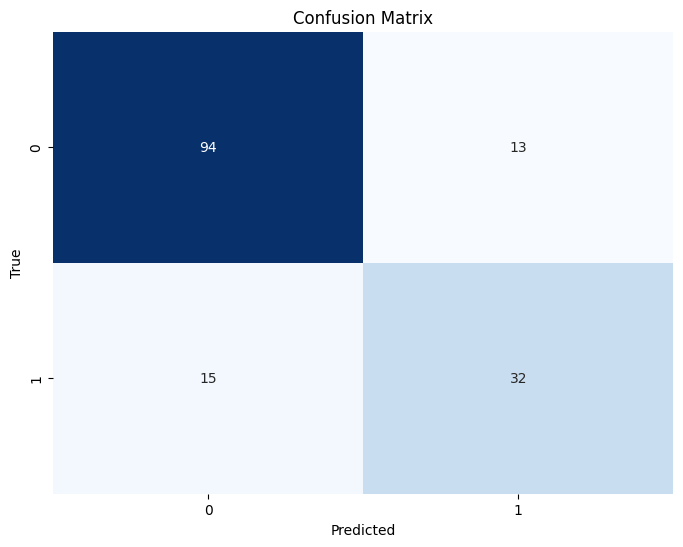

In [47]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

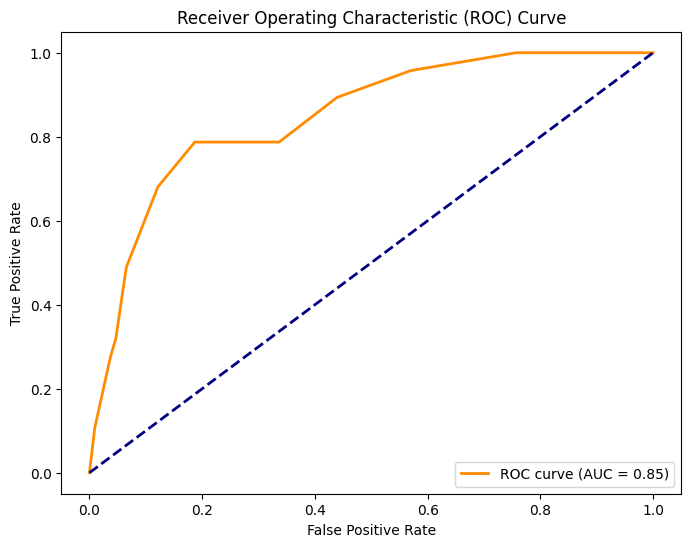

In [48]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid